# PyDTM Toolbox

This Notebook details how to use the PyDTM Python librairy to access [IOM's DTM API](https://dtm.iom.int/data-and-analysis/dtm-api) with python.

In [1]:
# Install packages
#!pip install -r env/requirements.txt

## Basic requests

The DTM API provides data at administrative levels: country, first sub-national level (admin 1), and second sub-national level (admin 2).

[More informations about administrative division levels here.](https://sedac.ciesin.columbia.edu/povmap/ds_defs_admin.jsp#:~:text=Administration%20Level%20Definitions&text=National%2Dlevel%20administrative%20boundary.,common%20political%20or%20administrative%20divisions.)




As a test, we are going to query all the data from Yemen between January and December 2023 for all 3 available admin levels.

### Country level

In [2]:
from pydtm.api import countryLevelData
#help(countryLevelData)

In [3]:
# Test country level request with the minimum parameters required
response_country = countryLevelData(admin0Pcode="YEM", monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023, to_pandas=True)
#print(response_country)
print("Number of data points for selected area and period: ",len(response_country))
response_country.head()

Number of data points for selected area and period:  19


,id,operation,admin0Name,admin0Pcode,numPresentIdpInd,reportingDate,yearReportingDate,monthReportingDate,roundNumber,assessmentType
0,2054,Yemen conflict,Yemen,YEM,1267590,2015-07-30T00:00:00,2015,7,3,BA
1,2055,Yemen conflict,Yemen,YEM,2025060,2016-12-31T00:00:00,2016,12,12,BA
2,2056,Yemen conflict,Yemen,YEM,1214767,2016-06-30T00:00:00,2016,6,9,BA
3,2053,Yemen conflict,Yemen,YEM,2199612,2016-09-30T00:00:00,2016,9,11,BA
4,2058,Yemen conflict,Yemen,YEM,2229846,2016-07-31T00:00:00,2016,7,10,BA


### Admin 1 level

In [4]:
from pydtm.api import admin1LevelData
#help(admin1LevelData)

In [5]:
# Test admin1 level request with the minimum parameters required
response_admin1 = admin1LevelData(admin0Pcode="YEM", monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023, to_pandas=True)
#print(response_admin1)
print("Number of data points for selected area and period: ",len(response_admin1))
response_admin1.head()

Number of data points for selected area and period:  313


,id,operation,admin0Name,admin0Pcode,admin1Name,admin1Pcode,numPresentIdpInd,reportingDate,yearReportingDate,monthReportingDate,roundNumber,assessmentType
0,15833,Yemen conflict,Yemen,YEM,Sa'Ada,YE22,23170,2015-07-30T00:00:00,2015,7,3,BA
1,15844,Yemen conflict,Yemen,YEM,Al Mahwit,YE27,32250,2015-07-30T00:00:00,2015,7,3,BA
2,15846,Yemen conflict,Yemen,YEM,Socotra,YE32,2969,2015-07-30T00:00:00,2015,7,3,BA
3,15874,Yemen conflict,Yemen,YEM,Al Maharah,YE28,110,2015-07-30T00:00:00,2015,7,3,BA
4,15884,Yemen conflict,Yemen,YEM,Marib,YE26,14492,2015-07-30T00:00:00,2015,7,3,BA


### Admin 2 level

In [6]:
from pydtm.api import admin2LevelData
#help(admin2LevelData)

In [7]:
# Test admin2 level request with the minimum parameters required
response_admin2 = admin2LevelData(admin0Pcode="YEM", monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023, to_pandas=True)
#print(response_admin2)
print("Number of data points for selected area and period: ",len(response_admin2))
response_admin2.head()

Number of data points for selected area and period:  4288


,id,operation,admin0Name,admin0Pcode,admin1Name,admin1Pcode,admin2Name,admin2Pcode,numPresentIdpInd,reportingDate,yearReportingDate,monthReportingDate,roundNumber,assessmentType
0,102082,Yemen conflict,Yemen,YEM,Ibb,YE11,Mudhaykhirah,YE1117,5100,2015-07-30T00:00:00,2015,7,3,BA
1,102094,Yemen conflict,Yemen,YEM,Amanat Al Asimah,YE13,Bani Al Harith,YE1310,1048,2015-07-30T00:00:00,2015,7,3,BA
2,102091,Yemen conflict,Yemen,YEM,Hajjah,YE17,Hajjah,YE1729,1374,2015-07-30T00:00:00,2015,7,3,BA
3,102092,Yemen conflict,Yemen,YEM,Ibb,YE11,Jiblah,YE1112,2987,2015-07-30T00:00:00,2015,7,3,BA
4,102109,Yemen conflict,Yemen,YEM,Ibb,YE11,Al Makhadir,YE1107,180,2015-07-30T00:00:00,2015,7,3,BA


## Country codes

In the DTM API, country codes (admin0Pcodes) use the ISO3166 A-3 format. This section provides the list of country codes in that standard, as well as helper functions. 

[Country code source](https://gist.github.com/tadast/8827699).

In [8]:
import pandas as pd
from pydtm.utils import ISO3166_A3ToCountry, countryToISO3166_A3, load_ISO3166_data

ISO3166_data = load_ISO3166_data()
ISO3166_data.head()

,"""Country""",Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,"""Afghanistan""","""AF""","""AFG""","""4""","""33""","""65"""
1,"""Åland Islands""","""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,"""Albania""","""AL""","""ALB""","""8""","""41""","""20"""
3,"""Algeria""","""DZ""","""DZA""","""12""","""28""","""3"""
4,"""American Samoa""","""AS""","""ASM""","""16""","""-14.3333""","""-170"""


In [9]:
# Helper functions to convert between ISO3166_A3 and country name
print("FRA -> ",ISO3166_A3ToCountry("FRA"))
print("France -> ",countryToISO3166_A3("France"))

FRA ->  France
France ->  FRA


In [10]:
import pydtm

## Samples per countries

In this section, we use the `Geopandas` module to plot the number of samples

/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_16511/3391411824.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_16511/3391411824.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_16511/3391411824.py:52: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.natur

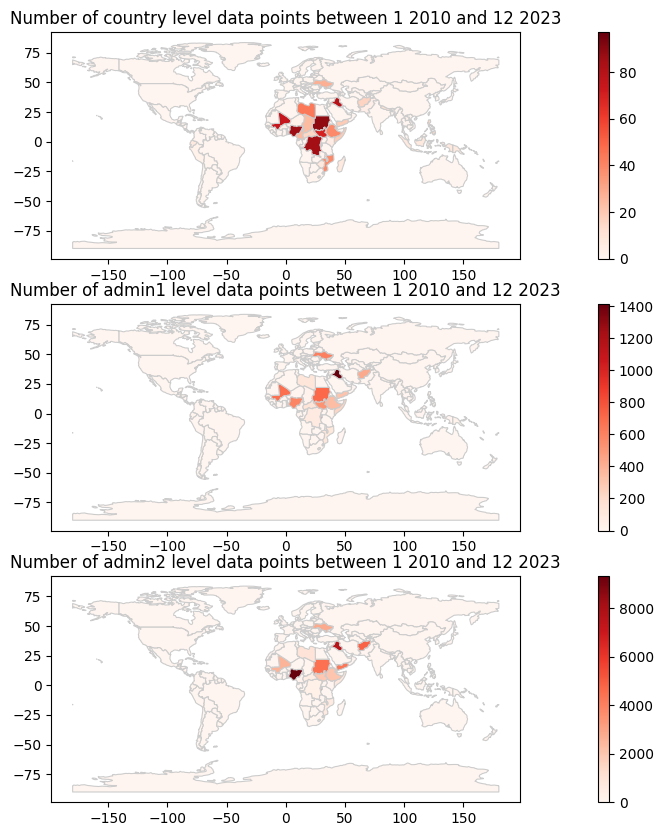

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(3, 1, figsize=(20, 10))

# Set the period
monthFrom_month = "1"
monthFrom_year = 2010

monthTo_month = "12"
monthTo_year = 2023

# Read the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = countryLevelData(admin0Pcode=country_id, monthFrom_month = monthFrom_month, monthFrom_year = monthFrom_year, monthTo_month = monthTo_month, monthTo_year = monthTo_year)
    if response_country['statusCode'] == 200:
        count_data_points = len(response_country['result'])
    else:
        count_data_points = 0

    world.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[0])

ax[0].set_title(f'Number of country level data points between {monthFrom_month} {monthFrom_year} and {monthTo_month} {monthTo_year}')

# Read the world shapefile
world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = admin1LevelData(admin0Pcode=country_id, monthFrom_month = monthFrom_month, monthFrom_year = monthFrom_year, monthTo_month = monthTo_month, monthTo_year = monthTo_year)
    if response_country['statusCode'] == 200:
        count_data_points = len(response_country['result'])
    else:
        count_data_points = 0

    world1.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world1.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[1])

ax[1].set_title(f'Number of admin1 level data points between {monthFrom_month} {monthFrom_year} and {monthTo_month} {monthTo_year}')


# Read the world shapefile
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = admin2LevelData(admin0Pcode=country_id, monthFrom_month = monthFrom_month, monthFrom_year = monthFrom_year, monthTo_month = monthTo_month, monthTo_year = monthTo_year)
    if response_country['statusCode'] == 200:
        count_data_points = len(response_country['result'])
    else:
        count_data_points = 0

    world2.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world2.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[2])

ax[2].set_title(f'Number of admin2 level data points between {monthFrom_month} {monthFrom_year} and {monthTo_month} {monthTo_year}')

# Show the plot
plt.show()